In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [8]:
def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for i in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
    return nn.Sequential(*layers)

In [33]:
def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels
    
    return nn.Sequential(*conv_blks,
                         nn.Flatten(),
                         nn.Linear(out_channels*3*3, 4096), nn.ReLU(), nn.Dropout(0.5), # (h, w) = (96, 96)
#                          nn.Linear(out_channels*3*3, 4096), nn.ReLU(), nn.Dropout(0.5), # (h, w) = (224, 224)
                         nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
                         nn.Linear(4096, 10))

In [19]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))
net = vgg(conv_arch) # vgg11

In [34]:
X = torch.randn((1, 1, 96, 96))
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__, 'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 16, 48, 48])
Sequential output shape:	 torch.Size([1, 32, 24, 24])
Sequential output shape:	 torch.Size([1, 64, 12, 12])
Sequential output shape:	 torch.Size([1, 128, 6, 6])
Sequential output shape:	 torch.Size([1, 128, 3, 3])
Flatten output shape:	 torch.Size([1, 1152])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


In [32]:
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
print(small_conv_arch)
net = vgg(small_conv_arch)

[(1, 16), (1, 32), (2, 64), (2, 128), (2, 128)]


loss 0.173, train acc 0.936, test acc 0.922
3011.9 examples/sec on cuda:0


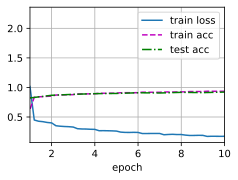

In [15]:
lr, epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, epochs, lr, d2l.try_gpu())

loss 0.228, train acc 0.916, test acc 0.903
12295.3 examples/sec on cuda:0


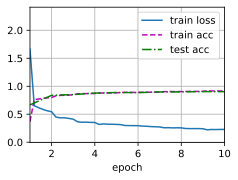

In [35]:
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)
lr, epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
d2l.train_ch6(net, train_iter, test_iter, epochs, lr, d2l.try_gpu())